In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("clean_df.csv")

In [3]:
df.shape

(100000, 28)

In [4]:
variables = []
dtypes = []
count = []
unique = []
missing = []


for item in df.columns:
    variables.append(item)
    dtypes.append(df[item].dtype)
    count.append(len(df[item]))
    unique.append(len(df[item].unique()))
    missing.append(df[item].isna().sum())

output = pd.DataFrame({
    'variable': variables, 
    'dtype': dtypes,
    'count': count,
    'unique': unique,
    'missing': missing, 
   
})    
output.sort_values("missing",ascending=False).reset_index(drop=True)
output

,variable,dtype,count,unique,missing
0,ID,int64,100000,100000,0
1,Customer_ID,int64,100000,12500,0
2,Month,int64,100000,8,0
3,Name,object,100000,10128,0
4,Age,float64,100000,43,0
5,SSN,float64,100000,12500,0
6,Occupation,object,100000,15,0
7,Annual_Income,float64,100000,12488,0
8,Monthly_Inhand_Salary,float64,100000,13241,0
9,Num_Bank_Accounts,float64,100000,12,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [6]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [7]:
df.drop(columns=['SSN', 'Name',"ID",'Customer_ID'],inplace = True)

In [8]:
num_cols = df.select_dtypes(include=['int','float']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [9]:
len(num_cols)

18

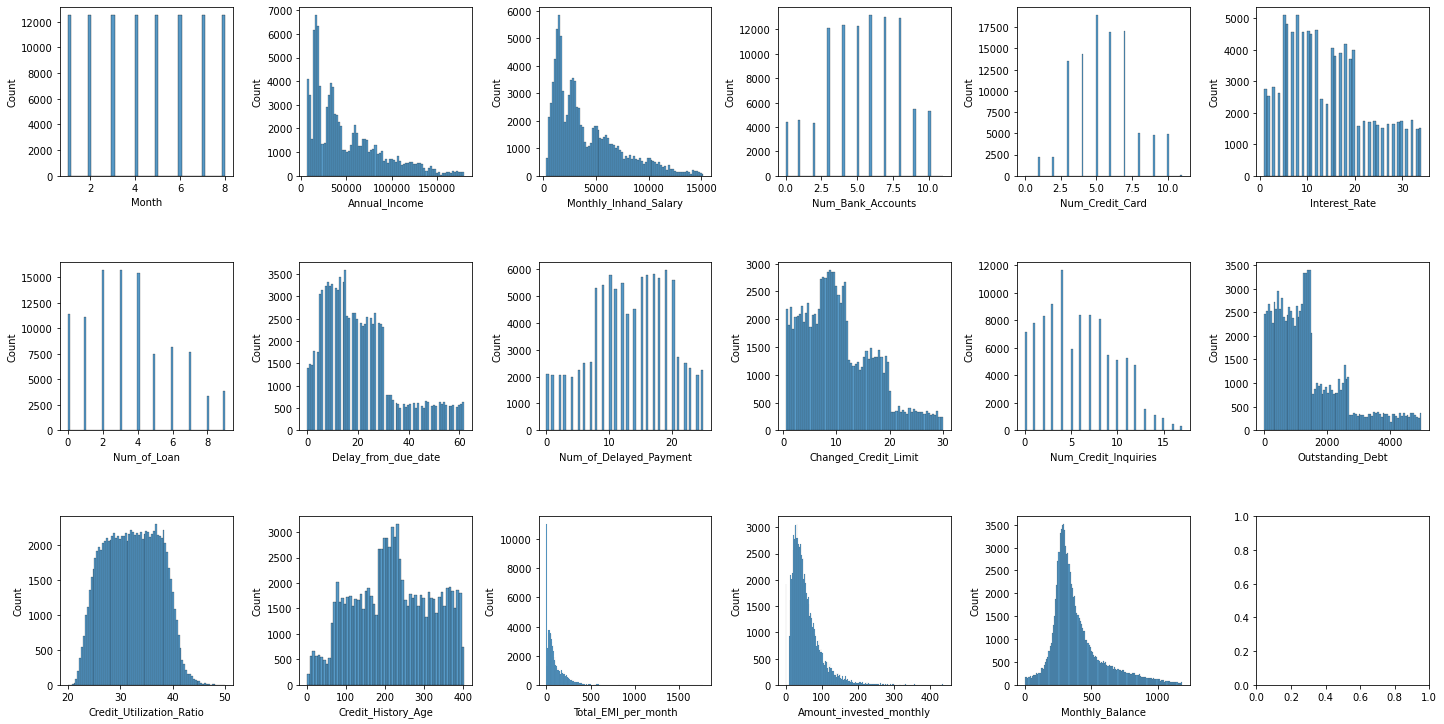

In [10]:
# ploting histplot 
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_cols:
    if col != 'Age':
        sns.histplot(x=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


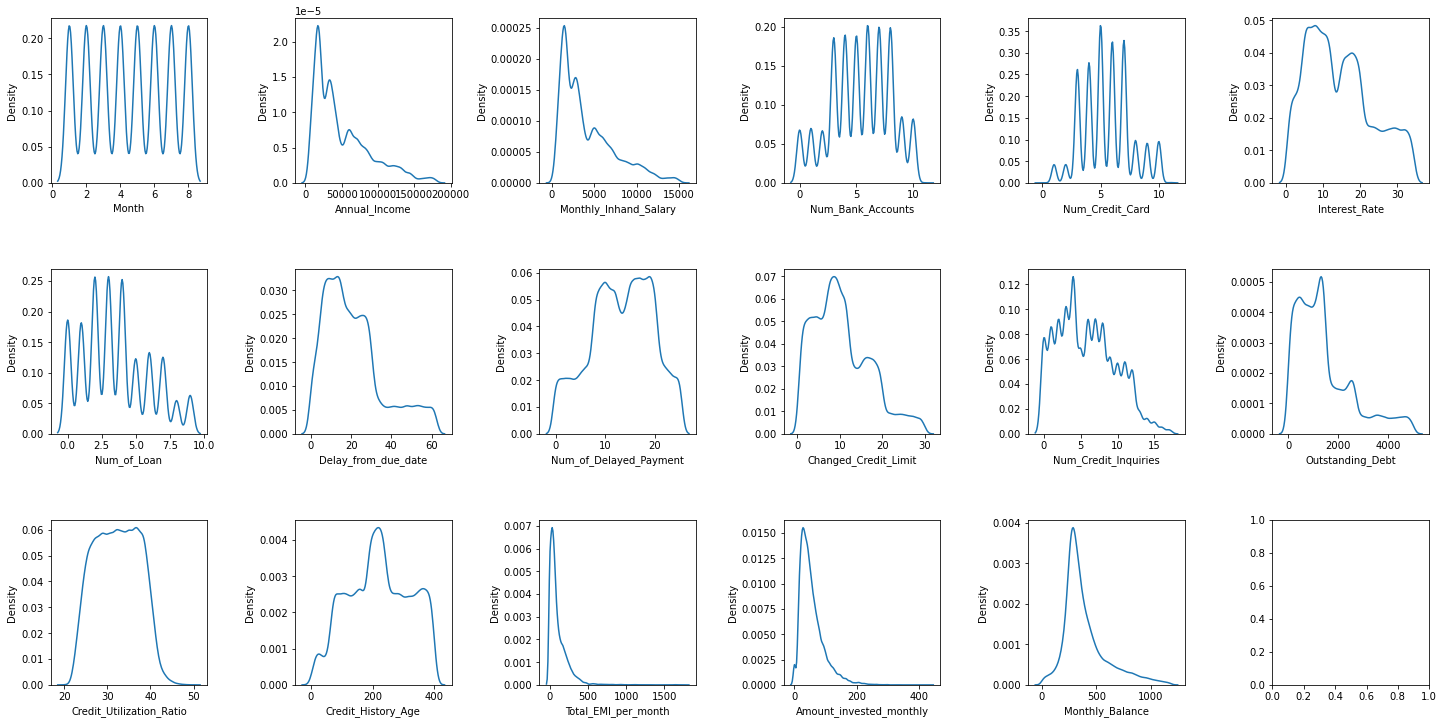

In [11]:
# ploting kde 
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_cols:
    if col != 'Age':
        sns.kdeplot(x=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


**Observation**
* Annual_income
* Monthly_Inhand_Salary
* Outstanding_Debt
* Total_EMI_per_month         
* Amount_invested_monthly     
* Monthly_Balance 
* Delay_from_due_date
* Changed_Credit_Limit

In [12]:
df.skew()

C:\Users\Sumeet Maheshwari\AppData\Local\Temp\ipykernel_3636\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Month                       0.000000
Age                         0.156338
Annual_Income               1.130223
Monthly_Inhand_Salary       1.128690
Num_Bank_Accounts          -0.190015
Num_Credit_Card             0.225808
Interest_Rate               0.496232
Num_of_Loan                 0.445609
Delay_from_due_date         0.969840
Num_of_Delayed_Payment     -0.214470
Changed_Credit_Limit        0.708342
Num_Credit_Inquiries        0.406825
Outstanding_Debt            1.207536
Credit_Utilization_Ratio    0.028617
Credit_History_Age         -0.048832
Total_EMI_per_month         4.041492
Amount_invested_monthly     1.761036
Monthly_Balance             1.355614
dtype: float64

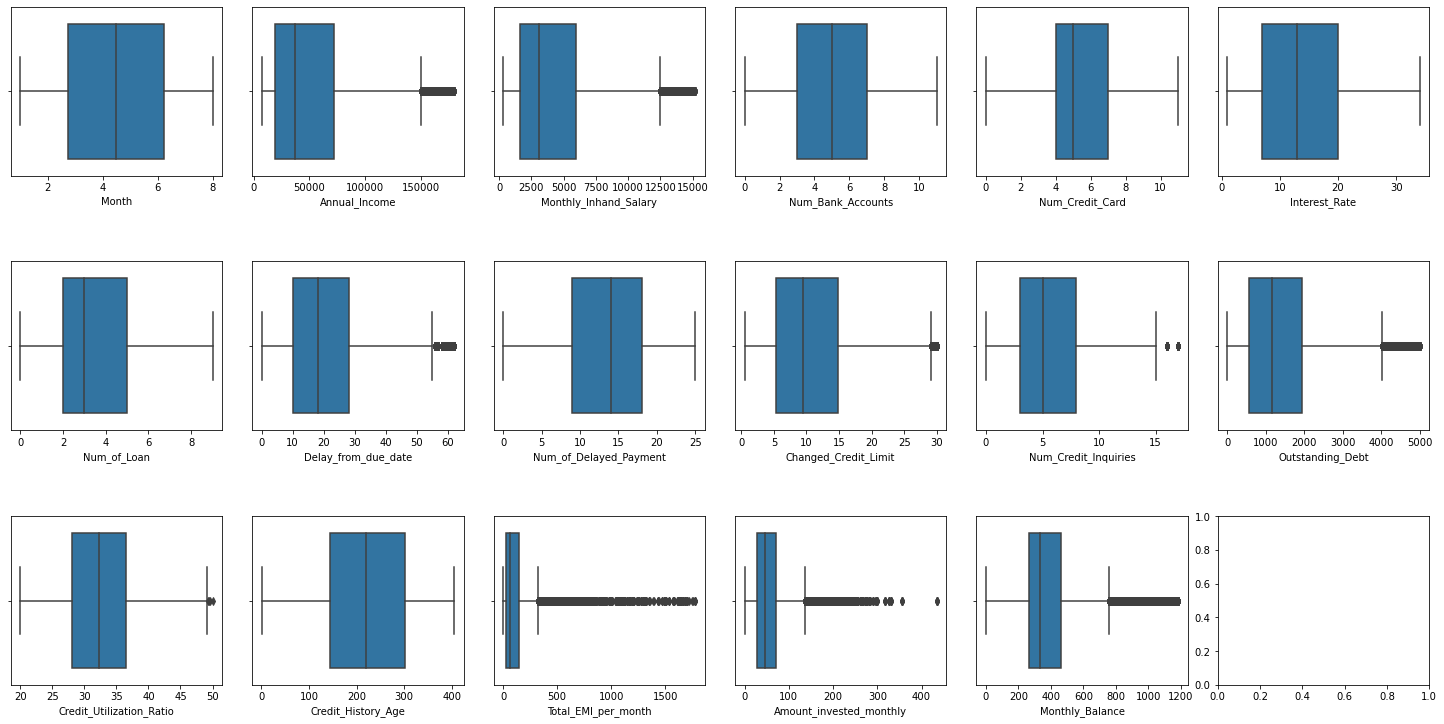

In [13]:
# ploting kde 
fig, ax = plt.subplots(ncols=6, nrows=3, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in num_cols:
    if col != 'Age':
        sns.boxplot(x=col, data=df, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


In [14]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
print(num_features)

Num of Numerical Features : 18
['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [15]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print('Num of Categorical Features :', len(cat_features))
print(cat_features)
     

Num of Categorical Features : 6
['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']


In [16]:
discrete_feature=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_feature))
print(discrete_feature)

Num of Discrete Features : 5
['Month', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Num_Credit_Inquiries']


In [18]:

year_features=[feature for feature in df.columns if 'Data' in feature or 'Month' in feature or "Year" in feature]
print('Num of Year Features :',len(year_features))
print(year_features)

Num of Year Features : 3
['Month', 'Monthly_Inhand_Salary', 'Monthly_Balance']


In [19]:
continuous_feature=[feature for feature in num_features if feature not in discrete_feature+year_features]
print('Num of Continuous Features :',len(continuous_feature))
print(continuous_feature)

Num of Continuous Features : 11
['Age', 'Annual_Income', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly']


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def compute_vif(considered_features, df):
    
    X = df[considered_features]
    # the calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif
     

In [23]:
vif = compute_vif(num_features, df)

C:\Users\Sumeet Maheshwari\AppData\Local\Temp\ipykernel_3636\108586559.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


In [24]:
vif[vif['VIF']>1.5]

,Variable,VIF
2,Annual_Income,316.523135
3,Monthly_Inhand_Salary,308.250599
4,Num_Bank_Accounts,1.991221
5,Num_Credit_Card,1.530835
6,Interest_Rate,2.438714
7,Num_of_Loan,2.686698
8,Delay_from_due_date,1.987774
9,Num_of_Delayed_Payment,1.917986
11,Num_Credit_Inquiries,2.303638
12,Outstanding_Debt,2.537445
